In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [2]:
import ipykernel
print(ipykernel.__version__)

7.0.0


In [3]:
import sys
print(sys.executable)

c:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\myenv\Scripts\python.exe


### Reading Data

In [4]:
product_detail = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\product_details.csv")
store_info = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\store_info.csv")
supplier_info = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\supplier_info.csv")
weather_data = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\weather_data.csv")
weekly_sales = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\weekly_sales.csv")

##### Data Details

In [5]:
# Product details 
pd.concat([product_detail.head(), product_detail.tail()])

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,1000,Whole Wheat Bread 800g,Bakery,4,4
1,1001,White Sandwich Loaf,Bakery,2,8
2,1002,Croissant 4-pack,Bakery,2,5
3,1003,Blueberry Muffins 6-pack,Bakery,4,10
4,1004,Chocolate Chip Cookies,Bakery,4,7
43,1043,English Breakfast Tea 80bags,Beverages,246,9
44,1044,Sparkling Water 1L,Beverages,186,1
45,1045,Lemonade 2L,Beverages,356,9
46,1046,Protein Shake 4-pack,Beverages,158,8
47,1047,Green Tea 40bags,Beverages,92,3


In [6]:
# Store_info data
pd.concat([store_info.head(), store_info.tail()])

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330
10,510,North East,3000,784
11,511,South West,3000,634
12,512,South East,5000,1697
13,513,South West,4000,1322
14,514,South West,3000,1001


In [7]:
# Supplier_info data
pd.concat([supplier_info.head(), supplier_info.tail()])

,Supplier_ID,Supplier_Name,Lead_Time_Days,Supply_Capacity
0,1,FreshFoods UK Ltd.,1,68047
1,2,Quality Provisions Co.,2,35230
2,3,FarmDirect Suppliers Ltd.,2,71976
3,4,PremiumGoods Wholesale,3,48776
4,5,LocalHarvest Distributors,2,11306
5,6,OrganicChoice Partners,2,31776
6,7,SwiftDelivery Foods UK,2,59474
7,8,TrustedSource Provisions,3,46959
8,9,GreenValley Suppliers,3,54320
9,10,BestQuality Foods Ltd.,2,53748


In [8]:
# Weather data
pd.concat([weather_data.head(), weather_data.tail()])

,Week_Number,Region,Avg_Temperature,Rainfall,Holiday_Flag
0,2024-W01,Midlands,7.4,32.1,0
1,2024-W01,South East,10.5,15.7,0
2,2024-W01,North West,6.8,28.5,1
3,2024-W01,London,9.9,23.0,1
4,2024-W01,South West,10.0,45.9,1
359,2024-W52,North West,7.4,17.2,1
360,2024-W52,London,11.6,10.4,1
361,2024-W52,South West,8.7,16.2,1
362,2024-W52,North East,5.2,19.2,1
363,2024-W52,Wales,9.6,12.8,1


In [9]:
# Weekly sales data
pd.concat([weekly_sales.head(), weekly_sales.tail()])

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46
37435,2024-W52,1043,514,895,488.97,15,22,1.62
37436,2024-W52,1044,514,1558,657.76,10,38,5.05
37437,2024-W52,1045,514,993,442.56,0,24,5.72
37438,2024-W52,1046,514,2168,1502.52,25,54,3.82
37439,2024-W52,1047,514,658,940.83,0,16,4.37


# data reading ends

Text(0, 0.5, 'Wastage Units')

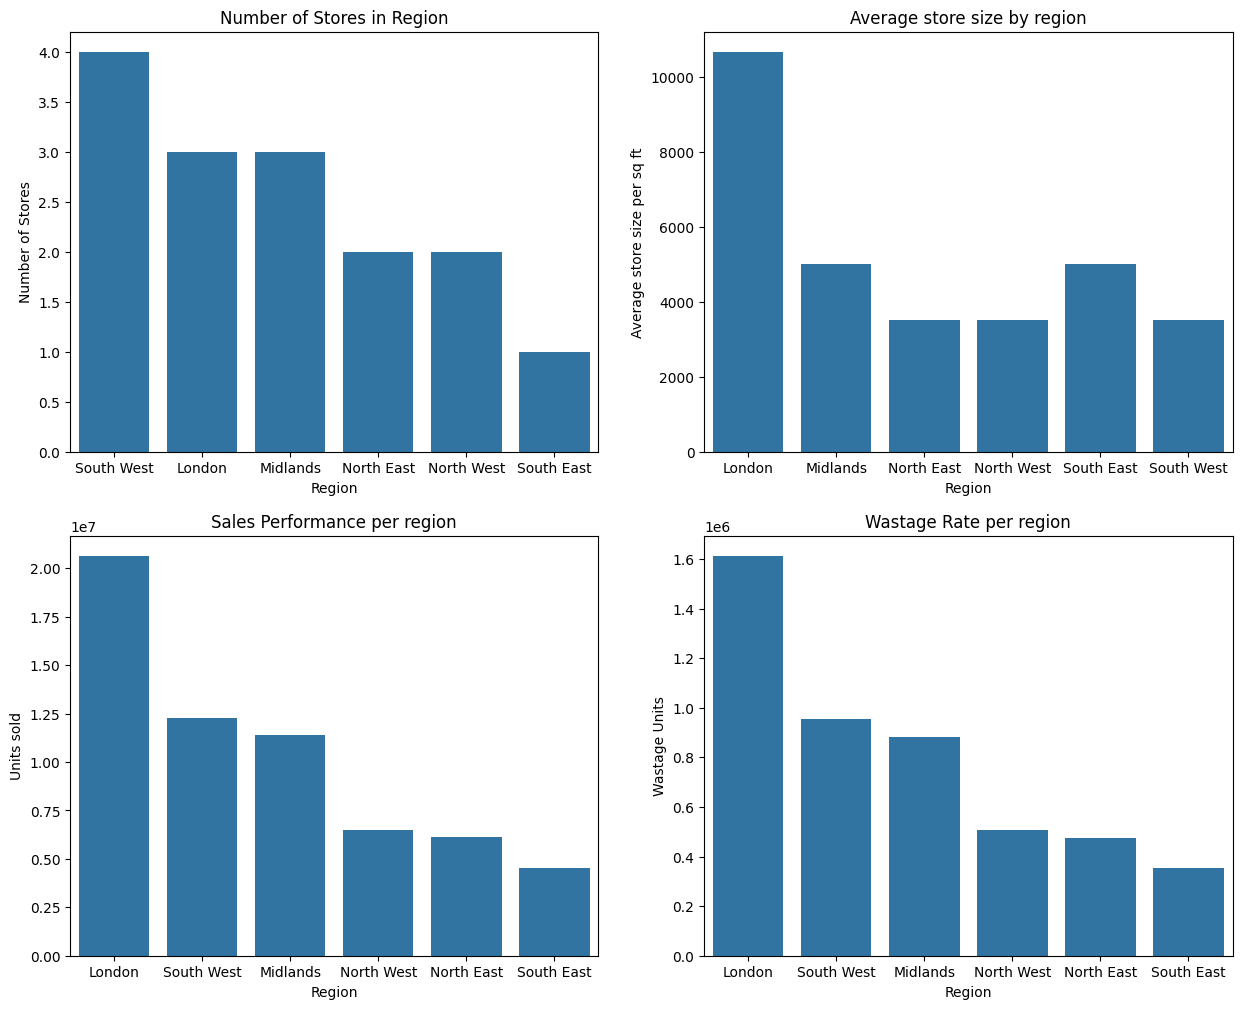

In [10]:
# Sales Performance by Region
plt.figure(figsize=(15, 12))

# Number of stores per region
plt.subplot(2, 2, 1)
region_store_counts = store_info['Region'].value_counts()
sns.barplot(x=region_store_counts.index, y=region_store_counts.values)
plt.title("Number of Stores in Region")
plt.xlabel("Region")
plt.ylabel("Number of Stores")

# Average store size per region
plt.subplot(2, 2, 2)
store_size_by_region = store_info.groupby('Region')['Store_Size'].mean()
sns.barplot(x=store_size_by_region.index, y=store_size_by_region.values)
plt.title("Average store size by region")
plt.xlabel("Region")
plt.ylabel("Average store size per sq ft")

# Sales performance per region
plt.subplot(2, 2, 3)
region_sales = weekly_sales.merge(store_info, on="Store_ID")
store_region_performance = region_sales.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
sns.barplot(x=store_region_performance.index, y=store_region_performance.values)
plt.title("Sales Performance per region")
plt.xlabel("Region")
plt.ylabel("Units sold")

# Wastage rate per region
plt.subplot(2, 2, 4)
goods_wastage_by_region = region_sales.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
sns.barplot(x=goods_wastage_by_region.index, y=goods_wastage_by_region.values)
plt.title("Wastage Rate per region")
plt.xlabel("Region")
plt.ylabel("Wastage Units")

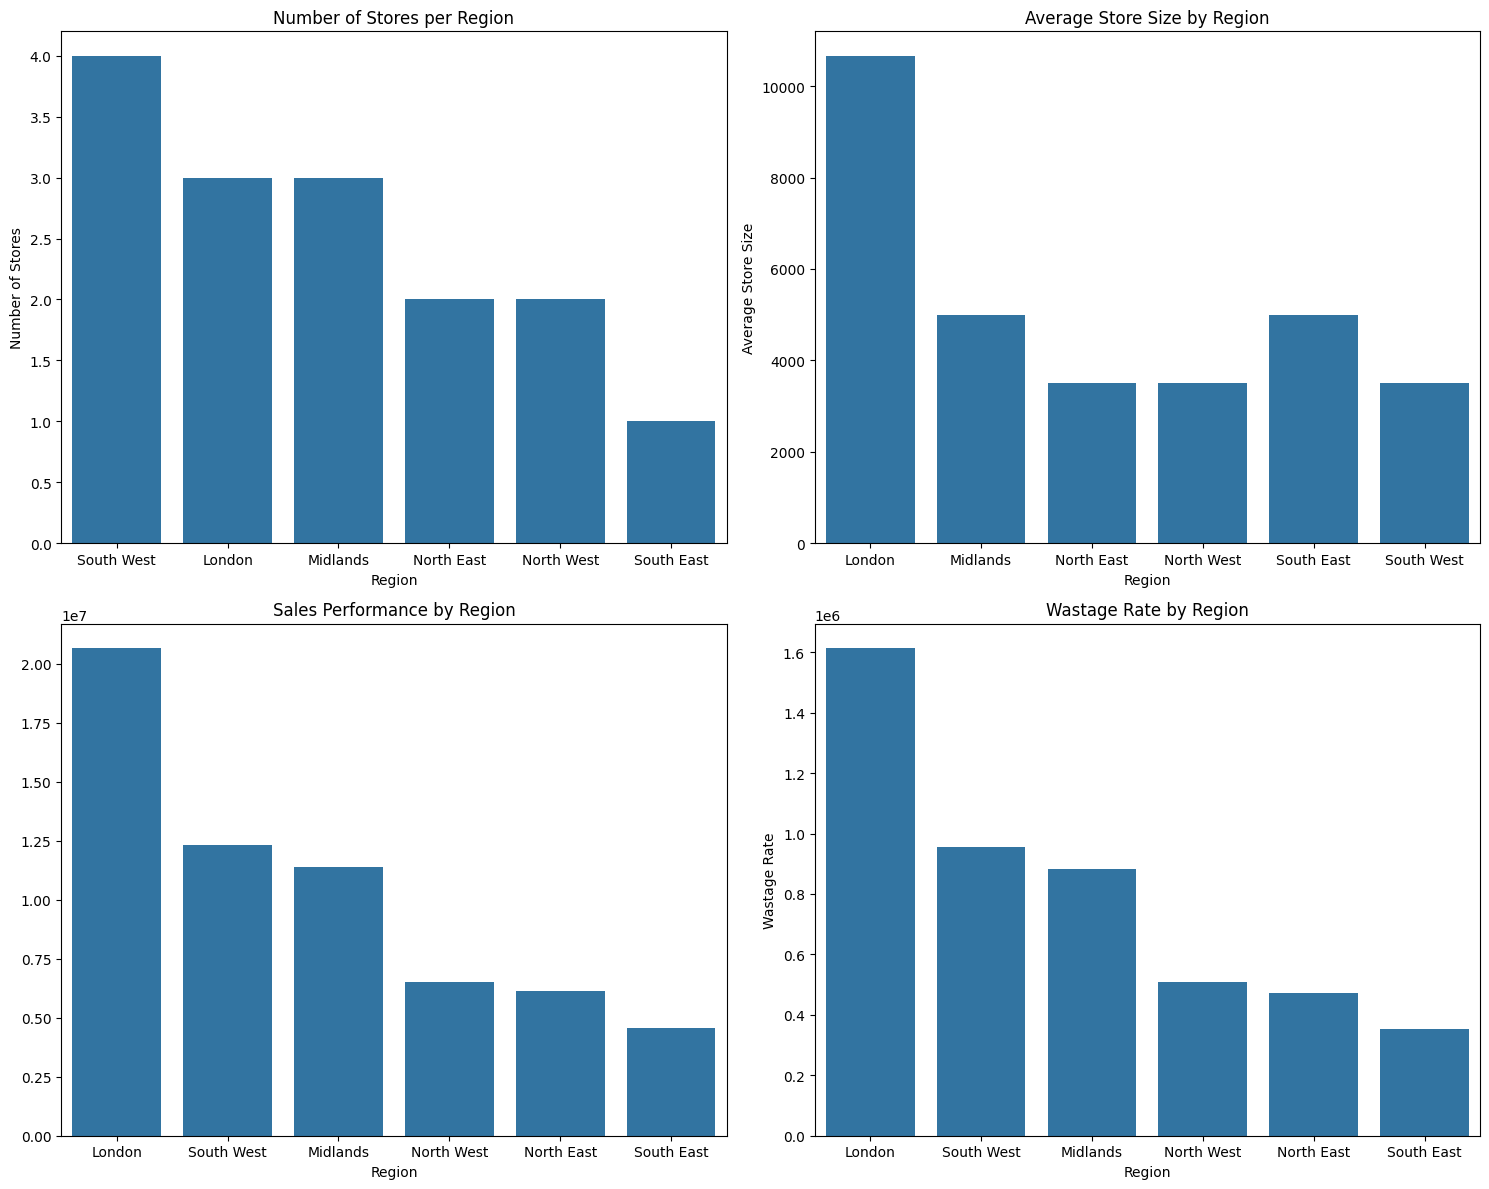

In [11]:
# REGIONAL PERFORMANCE

plt.figure(figsize=(15,12))

# Total number of Stores per region
plt.subplot(2, 2, 1)
region_store_counts = store_info['Region'].value_counts()
sns.barplot(x=region_store_counts.index, y=region_store_counts.values)
plt.title('Number of Stores per Region')
plt.xlabel('Region')
plt.ylabel('Number of Stores')

# Average Store Size per Region
plt.subplot(2, 2, 2)
store_size_by_region = store_info.groupby('Region')['Store_Size'].mean()
sns.barplot(x=store_size_by_region.index, y=store_size_by_region.values)
plt.title('Average Store Size by Region')
plt.xlabel('Region')
plt.ylabel('Average Store Size')

# Sales Performance per Region
plt.subplot(2, 2, 3)
region_sales = weekly_sales.merge(store_info, on='Store_ID')
store_region_performance = region_sales.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
sns.barplot(x=store_region_performance.index, y=store_region_performance.values)
plt.title('Sales Performance by Region')
plt.xlabel('Region')


# Wastage Rate per Region
plt.subplot(2, 2, 4)
goods_wastage_per_region =  region_sales.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
sns.barplot(x=goods_wastage_per_region.index, y=goods_wastage_per_region.values)
plt.title('Wastage Rate by Region')
plt.xlabel('Region')
plt.ylabel('Wastage Rate')

plt.tight_layout()
plt.show()

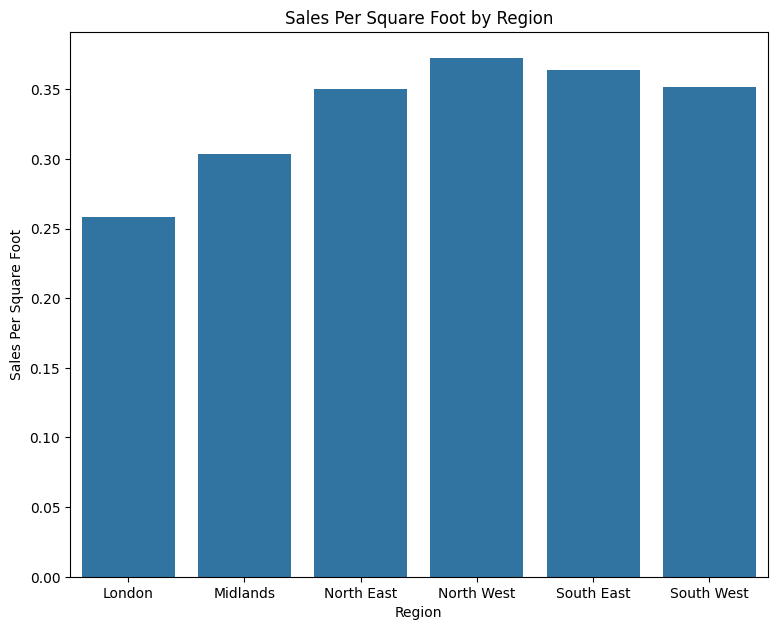

In [12]:
# Sales Per Square Foot
plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
region_totals = region_sales.groupby('Region').agg({
    'Units_Sold': 'sum',
    'Store_Size': 'sum'
}).reset_index()

region_totals['Sales_Per_Square_Foot'] = region_totals['Units_Sold'] / region_totals['Store_Size']
sns.barplot(x=region_totals['Region'], y=region_totals['Sales_Per_Square_Foot'])
plt.title('Sales Per Square Foot by Region')
plt.xlabel('Region')
plt.ylabel('Sales Per Square Foot')

plt.tight_layout()
plt.show()

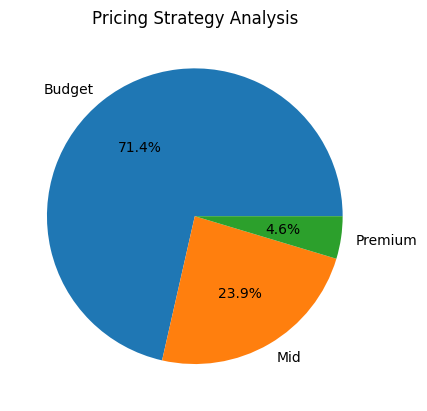

In [13]:
# PRICING STRATEGY ANALYSIS

# Segment products into 3 price bands: budget (<5), mid (5-10), premium (>=10)
region_sales['Price_Band'] = pd.cut(region_sales['Price'], bins=[-np.inf, 5, 10, np.inf], labels=['Budget', 'Mid', 'Premium'])
plt.pie(region_sales['Price_Band'].value_counts(), labels=region_sales['Price_Band'].value_counts().index, autopct='%1.1f%%')
plt.title('Pricing Strategy Analysis')
plt.show()

C:\Users\akann\AppData\Local\Temp\ipykernel_44148\1020595870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_per_product_category.index, y=price_per_product_category.values, palette=['blue', 'green', 'yellow', 'red'])


([<matplotlib.axis.XTick at 0x1f7a311a990>,
 [Text(0, 0, '0'),
  Text(1, 0, '5'),
  Text(2, 0, '10'),
  Text(3, 0, '15'),
  Text(4, 0, '20'),
  Text(5, 0, '25')])

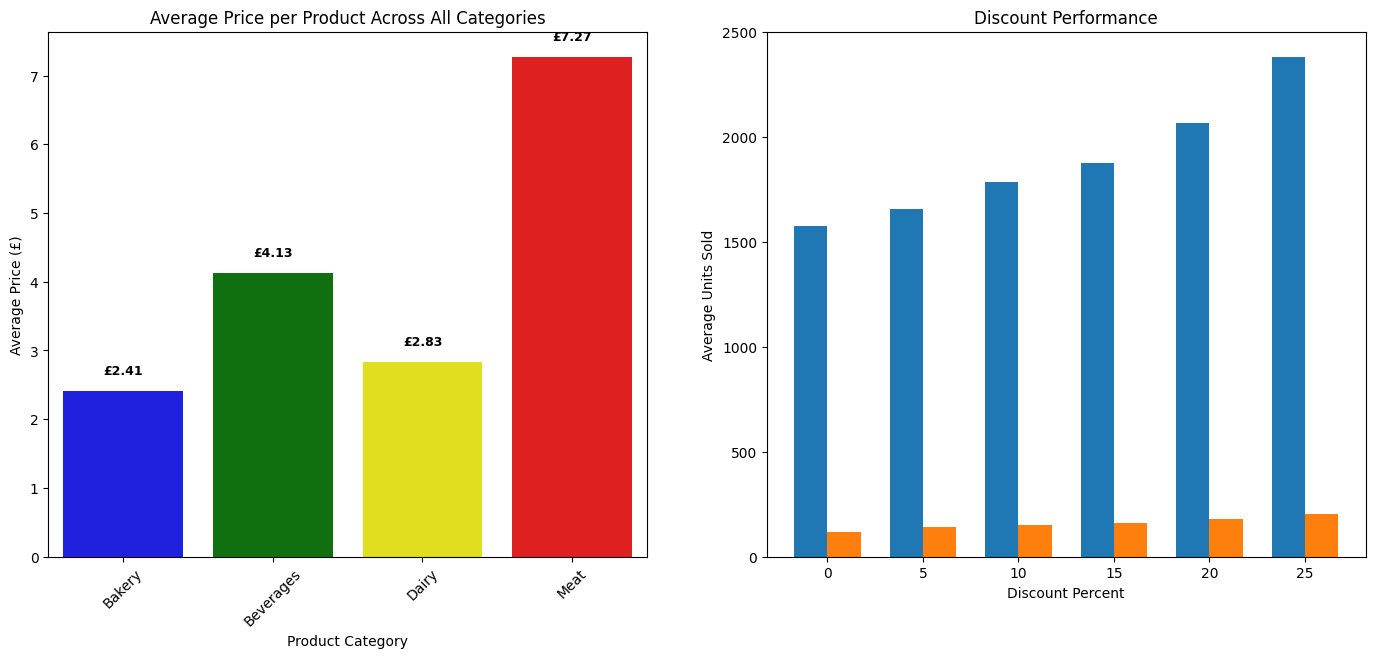

In [14]:
# PROMOTION EFFECTIVE (DISCOUNT PERFORMANCE)

plt.figure(figsize=(17,15))

plt.subplot(2, 2, 1)
# Average Price per Product Across All Categories
category_price = weekly_sales.merge(product_detail, on='Product_ID')
price_per_product_category = category_price.groupby('Product_Category')['Price'].mean()
sns.barplot(x=price_per_product_category.index, y=price_per_product_category.values, palette=['blue', 'green', 'yellow', 'red'])
plt.title('Average Price per Product Across All Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)

for i, (cat, val) in enumerate(zip(price_per_product_category.index, price_per_product_category.values)):
    plt.text(i, val + 0.2, f'£{val:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=9)


# Discount Performance
# We are trying to ge how the sales perform by each discount percentage
# in this plot we used aggregation, why is the aggregate used
plt.subplot(2, 2, 2)
discount_performance = weekly_sales.groupby('Discount_Percent').agg({
    'Units_Sold': 'mean',
    'Wastage_Units': 'mean'
}).reset_index()

x = np.arange(len(discount_performance))
width = 0.35

bars1 = plt.bar(x - width/2, discount_performance['Units_Sold'], width, label='Units Sold')
bars2 = plt.bar(x + width/2, discount_performance['Wastage_Units'], width, label='Wastage Units')

plt.title('Discount Performance')
plt.xlabel('Discount Percent')
plt.ylabel('Average Units Sold')
plt.xticks(x, discount_performance['Discount_Percent'])

In [15]:
# Compare sales at the best discount vs. no discount, and calculate the percentage sales lift
discount_sales = weekly_sales[weekly_sales['Discount_Percent'] == 25]
no_discount_sales = weekly_sales[weekly_sales['Discount_Percent'] == 0]

discount_units_sold = discount_sales['Units_Sold'].sum()
no_discount_units_sold = no_discount_sales['Units_Sold'].sum()

# Calculate percentage lift
sales_lift = ((discount_units_sold - no_discount_units_sold) / no_discount_units_sold) * 100

print(f"Units Sold with 25% Discount: {discount_units_sold}")
print(f"Units Sold with No Discount: {no_discount_units_sold}")
print(f"Sales Lift at 25% Discount: {sales_lift:.2f}%")

Units Sold with 25% Discount: 2060812
Units Sold with No Discount: 45269818
Sales Lift at 25% Discount: -95.45%


###### MARKETING SPEND EFFECTIVENESS

Correlation between marketing spend and sales
H0: There is no difference between the distribution of Marketing Spend with that of a normal distribution.

H1: There is a difference between the distribution of Marketing Spend with that of a normal distribution.

In [26]:
# Perform Shapiro-Wilk test
marketing_spend_statistic, marketing_spend_p_value = shapiro(category_metrics["Marketing_Spend"])

print(f"Marketing Spend Shapiro-Wilk Statistic: {marketing_spend_statistic:.4f}")
print(f"Marketing Spend P-value: {marketing_spend_p_value:.4f}")

NameError: name 'shapiro' is not defined

In [ ]:
Looking at the p-value, which is less than the significant 5%(0.05), the null hypothesis is rejected, therefore this suggests that there is sufficient evidence to suggest that there is a difference between Marketing Spend and that of a normal distribution.

H0: There is no difference between the distribution of Units Sold with that of a normal distribution.

H1: There is a difference between the distribution of Units Sold with that of a normal distribution.

In [54]:
# Perform Shapiro-Wilk test
units_sold_statistic, units_sold_p_value = shapiro(category_metrics["Units_Sold"])

print(f"Units Sold Shapiro-Wilk Statistic: {units_sold_statistic:.4f}")
print(f"Units Sold P-value: {units_sold_p_value:.4f}")

NameError: name 'shapiro' is not defined

In [ ]:
Looking at the p-value which is greater than the significant 5% (0.05) the null hypothesis is accepted and there is enough evidence to suggest that there is no difference between the units sold and that of a normal distribution.

Identifying that the Unit_Sold variable is normally distributed while the Marketing Spend is not, therefore I will proceed with the Spearman Correlation Co-efficient.

H0: There is no linear relationship between Marketing_Spend and Units_Sold.

H1: There is a linear relationship between Marketing_Spend and Units_Sold.

In [ ]:
# Perform Spearman Correlation Co-efficient between Marketing_Spend and Units_Sold

correlation, pvalue = spearmanr(category_metrics['Marketing_Spend'], category_metrics['Units_Sold'])

print(f"Spearman Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {pvalue:.4f}")

In [ ]:
Looking at the p-value, which is more than the significant 5% (0.05), it is clear that the null hypothesis should not be rejected. There is sufficient evidence to suggest than there is no linear relationship between Marketing Spend Units and Units Sold.

In [55]:
# Average marketing cost per unit sold
print(f"The average marketing cost per unit sold is £{category_metrics['Marketing_Spend'].mean():.2f}")

The average marketing cost per unit sold is £410.55


In [ ]:
# PRODUCT PERFORMANCE

In [56]:
# Top 5 best selling products
print("Top 5 best selling products")

top_5_best_selling_products = category_price.groupby('Product_ID')['Units_Sold'].sum().sort_values(ascending=False).head(5)
print(top_5_best_selling_products)
print('='*100)

# Get Product Names of the best selling products
top_5_best_selling_products_names = product_detail.loc[product_detail['Product_ID'].isin(top_5_best_selling_products.index), 'Product_Name']
print(top_5_best_selling_products_names)

Top 5 best selling products
Product_ID
1031    2093430
1030    2070145
1033    2053001
1029    2049192
1034    2046517
Name: Units_Sold, dtype: int64
29    Free Range Eggs 12-pack
30        Cottage Cheese 300g
31            Mozzarella 250g
33         Single Cream 300ml
34       Yogurt Drinks 6-pack
Name: Product_Name, dtype: object


In [57]:
# Generate revenue variable Price * (1-discount/100) * Units Sold
category_price['Revenue'] = category_price['Price'] * category_price['Units_Sold'] - category_price['Marketing_Spend']

In [58]:
# Identify top 5 revenue generating products
top_5_best_revenue_generating_products = category_price.groupby('Product_ID')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 best revenue generating products")
print(top_5_best_revenue_generating_products)
print('='*100)

# Get Product Names of the best revenue generating products
top_5_best_revenue_generating_products = product_detail.loc[product_detail['Product_ID'].isin(top_5_best_revenue_generating_products.index), 'Product_Name']
print(top_5_best_revenue_generating_products)

Top 5 best revenue generating products
Product_ID
1031    5711926.03
1034    5568411.50
1028    5555663.81
1024    5550544.18
1025    5543777.32
Name: Revenue, dtype: float64
24           Whole Milk 4-pint
25    Semi-Skimmed Milk 4-pint
28                 Butter 250g
31             Mozzarella 250g
34        Yogurt Drinks 6-pack
Name: Product_Name, dtype: object


In [59]:
# Top 5 highest-wastage products with >1000 units sold
top_5_highest_wastage_products = category_price[category_price['Units_Sold'] > 1000].groupby('Product_ID')['Wastage_Units'].sum().sort_values(ascending=False).head(5)
print("Top 5 highest-wastage products with >1000 units sold")
print(top_5_highest_wastage_products)
print('='*100)

# Get Product Names of the highest wastage products
top_5_highest_wastage_products_names = product_detail.loc[product_detail['Product_ID'].isin(top_5_highest_wastage_products.index), 'Product_Name']
print(top_5_highest_wastage_products_names)

Top 5 highest-wastage products with >1000 units sold
Product_ID
1001    218163
1002    215441
1011    215044
1009    211380
1006    207928
Name: Wastage_Units, dtype: int64
1       White Sandwich Loaf
2          Croissant 4-pack
6     Cinnamon Rolls 4-pack
9         Banana Bread Loaf
11            Donuts 8-pack
Name: Product_Name, dtype: object


In [60]:
# Top 5 highest-wastage products with >1000 units sold
top_5_highest_wastage_products = category_price[category_price['Units_Sold'] > 1000].groupby('Product_ID')['Wastage_Units'].sum().sort_values(ascending=False).head(5)
print("Top 5 highest-wastage products with >1000 units sold")
print(top_5_highest_wastage_products)
print('='*100)

# Get Product Names of the highest wastage products
top_5_highest_wastage_products_names = product_detail.loc[product_detail['Product_ID'].isin(top_5_highest_wastage_products.index), 'Product_Name']
print(top_5_highest_wastage_products_names)

Top 5 highest-wastage products with >1000 units sold
Product_ID
1001    218163
1002    215441
1011    215044
1009    211380
1006    207928
Name: Wastage_Units, dtype: int64
1       White Sandwich Loaf
2          Croissant 4-pack
6     Cinnamon Rolls 4-pack
9         Banana Bread Loaf
11            Donuts 8-pack
Name: Product_Name, dtype: object


In [ ]:
# SEASONAL TRENDS

In [61]:
category_price

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Revenue
0,2024-W01,1000,500,4853,670.37,0,718,2.46,Whole Wheat Bread 800g,Bakery,4,4,11268.01
1,2024-W01,1001,500,4274,1089.62,0,641,1.27,White Sandwich Loaf,Bakery,2,8,4338.36
2,2024-W01,1002,500,4215,1004.99,10,632,2.74,Croissant 4-pack,Bakery,2,5,10544.11
3,2024-W01,1003,500,5768,859.45,20,853,1.82,Blueberry Muffins 6-pack,Bakery,4,10,9638.31
4,2024-W01,1004,500,3403,576.70,0,503,3.46,Chocolate Chip Cookies,Bakery,4,7,11197.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,2024-W52,1043,514,895,488.97,15,22,1.62,English Breakfast Tea 80bags,Beverages,246,9,960.93
37436,2024-W52,1044,514,1558,657.76,10,38,5.05,Sparkling Water 1L,Beverages,186,1,7210.14
37437,2024-W52,1045,514,993,442.56,0,24,5.72,Lemonade 2L,Beverages,356,9,5237.40
37438,2024-W52,1046,514,2168,1502.52,25,54,3.82,Protein Shake 4-pack,Beverages,158,8,6779.24


In [62]:
# Convert the Week_Number to a proper datetime
category_price["week_start"] = pd.to_datetime(category_price["Week_Number"].astype('str') + "-1", format="%G-W%V-%u")

# Extract month as Year Month
category_price["month"] = category_price["week_start"].dt.to_period("M").astype(str)

# Ensure numeric columns are numeric
numeric_columns = category_price.select_dtypes(include=['number']).columns
category_price[numeric_columns] = category_price[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Aggregate
monthly_sales = category_price.groupby("month").agg({
    "Units_Sold": "sum",
    "Marketing_Spend": "sum",
    "Discount_Percent": "mean",
    "Wastage_Units": "sum",
    "Price": "mean",
    "Revenue": "sum" }).reset_index()

monthly_sales

,month,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Revenue
0,2024-01,6504602,1598882.19,2.859722,543425,4.137081,20113712.13
1,2024-02,4779449,1083026.99,2.947917,403577,4.121010,14476591.82
2,2024-03,5043509,1341693.44,2.854167,443252,4.168875,15168198.45
3,2024-04,5872254,1354092.99,3.106944,497656,4.143661,18021628.25
4,2024-05,4494979,1067142.05,2.670139,369459,4.189392,14283513.81
5,2024-06,4651312,1346479.63,3.116319,363611,4.108625,15015898.83
6,2024-07,5550597,1351689.33,2.891667,406817,4.158472,18628045.78
7,2024-08,4381436,1076318.53,2.798611,302190,4.215149,14707194.25
8,2024-09,5540003,1353303.20,2.812500,375388,4.146786,18374557.60
9,2024-10,4618961,1081362.87,2.883681,316185,4.177385,15588462.25


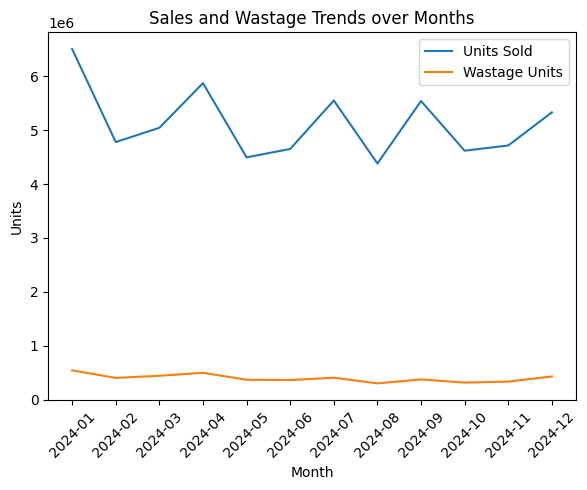

In [63]:
# Sort months chronologically (important for line plot)
monthly_sales = monthly_sales.sort_values("month")

# Line plot of sales and wastage trends over months
plt.figure(figsize=(6,5))
sns.lineplot(x="month", y="Units_Sold", data=monthly_sales, label="Units Sold")
sns.lineplot(x="month", y="Wastage_Units", data=monthly_sales, label="Wastage Units")
plt.title("Sales and Wastage Trends over Months")
plt.xlabel("Month")
plt.ylabel("Units")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# Best Sales Month
print(f"The best sales month is {monthly_sales.loc[monthly_sales['Revenue'].idxmax(), 'month']}")

The best sales month is 2024-01


In [65]:
# Month with the highest wastage
print(f"The month with the highest wastage is {monthly_sales.loc[monthly_sales['Wastage_Units'].idxmax(), 'month']}")

The month with the highest wastage is 2024-01


In [66]:
# Most Efficient marketing month
print(f"The most efficient marketing month is {monthly_sales.loc[monthly_sales['Marketing_Spend'].idxmin(), 'month']}")

The most efficient marketing month is 2024-05


##### SHELF LIFE CAPACITY

IS THERE A CORRELATION BETWEEN SHELF LIFE AND WASTAGE?
H0: There is no difference between the distribution of Shelf_Life_Days with that of a normal distribution.

H1: There is a difference between the distribution of Shelf_Life_Days with that of a normal distribution

In [ ]:
# Perform Shapiro-Wilk test
Shelf_Life_Days_statistic, Shelf_Life_Days_p_value = shapiro(category_price["Shelf_Life_Days"])

print(f"Shelf_Life_Days Amount Shapiro-Wilk Statistic: {Shelf_Life_Days_statistic:.4f}")
print(f"Shelf_Life_Days P-value: {Shelf_Life_Days_p_value:.4f}")

Looking at the p-value, which is less than the significant (5%), which is enough evidence to prove that the null hypothesis should be rejected and that there is a difference between the distribution of Shelf_Life_Days with that of a normal distribution.

H0: There is no difference between the distribution of Wastage_Units with that of a normal distribution.

H1: There is a difference between the distribution of Wastage_Units with that of a normal distribution

In [17]:
# Perform Shapiro-Wilk test
# Wastage_Units_statistic, Wastage_Units_p_value = shapiro(category_price["Wastage_Units"])

Looking at the p-value, which is less than the significant (5%), which is enough evidence to prove that the null hypothesis should be rejected and that there is a difference between the distribution of Wastage_Units with that of a normal distribution.

Knowing that both variables (Shelf_Life_Days and Wastage_Units) are not normally distributed, I will proceed with the Spearman Correlation Co-efficient.

H0: There is no linear relationship between Shelf_Life_Days and Wastage_Units.

H1: There is a linear relationship between Shelf_Life_Days and Wastage_Units.

Looking at the p-value, which is less than the significant 5% (0.05), it is clear that the null hypothesis should be rejected. There is sufficient evidence to suggest that there is a linear relationship between Shelf_Life_Days and Wastage_Unitst. The correlation coefficient, which is -0.63, indicates that there is a strong negative association between Shelf_Life_Days and Wastage_Units.

In [ ]:
# Category with the shortest shelf life
print(f"The category with the shortest shelf life is {category_price.loc[category_price['Shelf_Life_Days'].idxmin(), 'Product_Category']}")
# Category with the longest shelf life
print(f"The category with the longest shelf life is {category_price.loc[category_price['Shelf_Life_Days'].idxmax(), 'Product_Category']}")
# Categorty with highest wastage linked to shelf life
print(f"The category with the highest wastage linked to shelf life is {category_price.loc[category_price['Wastage_Units'].idxmax(), 'Product_Category']}")

# STORE EFFICIENCY ANALYSIS

In [16]:
store_category_price = store_info.merge(category_price, on='Store_ID')
store_category_price

,Store_ID,Region,Store_Size,Cold_Storage_Capacity,Week_Number,Product_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,500,London,12000,3788,2024-W01,1000,4853,670.37,0,718,2.46,Whole Wheat Bread 800g,Bakery,4,4
1,500,London,12000,3788,2024-W01,1001,4274,1089.62,0,641,1.27,White Sandwich Loaf,Bakery,2,8
2,500,London,12000,3788,2024-W01,1002,4215,1004.99,10,632,2.74,Croissant 4-pack,Bakery,2,5
3,500,London,12000,3788,2024-W01,1003,5768,859.45,20,853,1.82,Blueberry Muffins 6-pack,Bakery,4,10
4,500,London,12000,3788,2024-W01,1004,3403,576.70,0,503,3.46,Chocolate Chip Cookies,Bakery,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,514,South West,3000,1001,2024-W52,1043,895,488.97,15,22,1.62,English Breakfast Tea 80bags,Beverages,246,9
37436,514,South West,3000,1001,2024-W52,1044,1558,657.76,10,38,5.05,Sparkling Water 1L,Beverages,186,1
37437,514,South West,3000,1001,2024-W52,1045,993,442.56,0,24,5.72,Lemonade 2L,Beverages,356,9
37438,514,South West,3000,1001,2024-W52,1046,2168,1502.52,25,54,3.82,Protein Shake 4-pack,Beverages,158,8


In [72]:
# Best Perfoming store (highest units sold)
print(f"The best performing store is {store_category_price.loc[store_category_price['Units_Sold'].idxmax(), 'Store_ID']}")
print(f"The best performing store is located in {store_category_price.loc[store_category_price['Units_Sold'].idxmax(), 'Region']}")

# Lowest wastage store
print(f"The lowest wastage store is {store_category_price.loc[store_category_price['Wastage_Units'].idxmin(), 'Store_ID']}")
print(f"The lowest wastage store is located in {store_category_price.loc[store_category_price['Wastage_Units'].idxmin(), 'Region']}")

The best performing store is 500
The best performing store is located in London
The lowest wastage store is 506
The lowest wastage store is located in South West
